In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
df = pd.read_csv("/content/GYM.csv")

In [ ]:
df.head()

,number_people,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour
0,37,4,0,0,71.76,0,0,8,17
1,45,4,0,0,71.76,0,0,8,17
2,40,4,0,0,71.76,0,0,8,17
3,44,4,0,0,71.76,0,0,8,17
4,45,4,0,0,71.76,0,0,8,17


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
scaler.fit(df)

StandardScaler()

In [ ]:
stdf = scaler.transform(df)

In [ ]:
stdf

array([[ 0.34939892,  0.50956119, -0.6280507 , ..., -1.39393832,
         0.16260365,  0.70911589],
       [ 0.70199512,  0.50956119, -0.6280507 , ..., -1.39393832,
         0.16260365,  0.70911589],
       [ 0.48162249,  0.50956119, -0.6280507 , ..., -1.39393832,
         0.16260365,  0.70911589],
       ...,
       [-0.17949539,  1.01036016,  1.59222814, ...,  0.71739186,
        -1.28875789,  1.0068423 ],
       [-0.48801707,  1.01036016,  1.59222814, ...,  0.71739186,
        -1.28875789,  1.0068423 ],
       [-0.26764444,  1.01036016,  1.59222814, ...,  0.71739186,
        -1.28875789,  1.0068423 ]])

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(Components=)

SyntaxError: invalid syntax (<ipython-input-21-a4a7a82ed963>, line 1)

In [ ]:
features = ['number_people',	'day_of_week',	'is_weekend',	'is_holiday',	'temperature']
selected_features = df[features]

scaled_data = scaler.fit_transform(selected_features)

# Compute covariance matrix
covariance_matrix = pd.DataFrame(scaled_data).cov()

# Find the minimum covariance
min_covariance = covariance_matrix.min().min()

# Display the result
print("Minimum Covariance:", min_covariance)

Minimum Covariance: -0.17396060979023598


In [ ]:

# Create PCA model
pca = PCA(n_components=2)
# Fit and transform the scaled data
pca.fit(scaled_data)

# Get the eigenvalues
eigenvalues = pca.explained_variance_

# Display the result
print("Number of Eigenvalues:", len(eigenvalues))


Number of Eigenvalues: 2


In [ ]:


# Create PCA model
pca = PCA(n_components=2)

# Fit and transform the scaled data
pca.fit(scaled_data)

# Get eigenvalues and eigenvectors
eigenvalues = pca.explained_variance_
eigenvectors = pca.components_

# Create eigenpairs
eigenpairs = [(eigenvalues[i], eigenvectors[i]) for i in range(len(eigenvalues))]

# Sort eigenpairs by eigenvalues in descending order
eigenpairs.sort(key=lambda x: x[0], reverse=True)

# Calculate cumulative explained variance
cumulative_explained_variance = np.cumsum(eigenvalues) / np.sum(eigenvalues)

# Find the index of the eigenpair with the maximum cumulative explained variance
max_variance_index = np.argmax(cumulative_explained_variance) + 1

# Display the result
print("Maximum Cumulative Explained Variance:", cumulative_explained_variance[max_variance_index - 1])

Maximum Cumulative Explained Variance: 1.0


In [ ]:
from sklearn.decomposition import PCA

# Assuming 'scaled_data' is the scaled data from the previous code
# Specify the number of components (features) you want to keep in PCA
# n_components = len(features)

# Create PCA model
pca = PCA(n_components=2)

# Fit and transform the scaled data
pca.fit(scaled_data)

# Get explained variance ratios
explained_variance_ratios = pca.explained_variance_ratio_

# Find the maximum explained variance ratio
max_explained_variance_ratio = max(explained_variance_ratios)

# Display the result
print("Maximum Explained Variance Ratio:", max_explained_variance_ratio)


Maximum Explained Variance Ratio: 0.37366819253710004


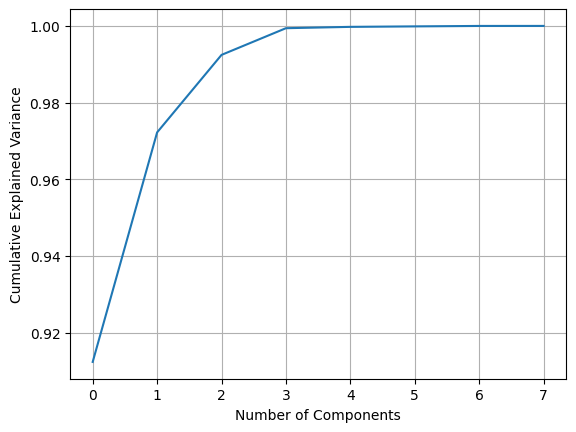

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt



# Assuming 'X' contains the feature columns
X = df.drop('hour', axis=1)  # Replace 'target_column' with the actual target column

# Standardize the data if needed
# X_standardized = StandardScaler().fit_transform(X)

# Apply PCA
pca = PCA()
pca.fit(X)

# Plot the cumulative explained variance
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()


In [ ]:


# Assuming 'X' contains the feature columns
X = df.drop('number_people', axis=1)  # Replace 'target_column' with the actual target column

# Standardize the data
X_standardized = StandardScaler().fit_transform(X)

# Apply PCA with n_components=2
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_standardized)

# Inverse transform to get the original (approx.) data
X_approx = pca.inverse_transform(X_pca)

# Calculate the difference in the sum of variances
sum_var_before = X_standardized.var().sum()
sum_var_after = X_approx.var().sum()
variance_difference = sum_var_before - sum_var_after

print("Difference in Sum of Variances:", variance_difference)


Difference in Sum of Variances: 0.601099629620155


In [ ]:

# Extract independent features
X = df.drop(['number_people'], axis=1)  # Replace 'target_column' with the actual target column

# Standardize the data
X_standardized = StandardScaler().fit_transform(X)

# Apply PCA
pca = PCA()
pca.fit(X_standardized)

# Extract the first 8 records
X_first_8 = X_standardized[:8, :]

# Calculate the sum of eigenvalues for the first 8 records
sum_eigenvalues_first_8 = sum(pca.explained_variance_[:8])

print("Sum of Eigenvalues for the First 8 Records:", sum_eigenvalues_first_8)


Sum of Eigenvalues for the First 8 Records: 8.000128652525614
